In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip

In [3]:
image = np.load('C:/Users/oryan/Documents/PySPAM_Original_Python_MCMC/APySPAM_MCMC/Inputs/Arp256.npy')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


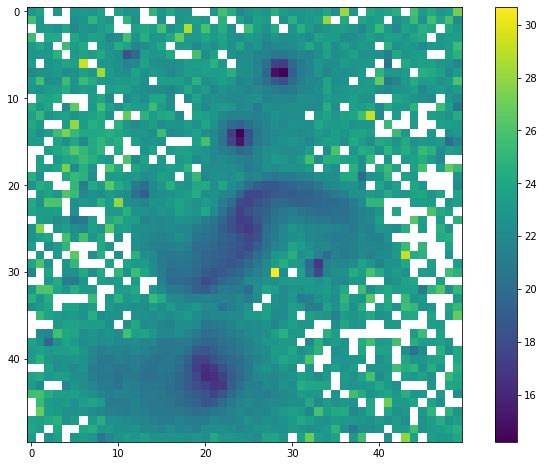

In [4]:
plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(image) - 48.6)
plt.colorbar()

In [13]:
clipped_image = sigma_clip(image,sigma=10,maxiters=1,cenfunc = 'median')

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


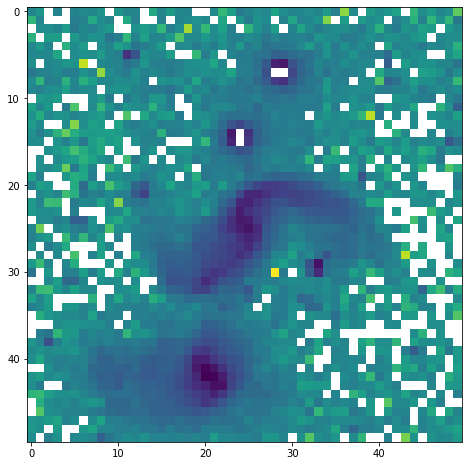

In [14]:
plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(clipped_image) - 48.6)

### Creating Mask Array

In [15]:
mask = clipped_image.mask

In [16]:
stellar_pixels = np.where(mask)

In [17]:
image_test = image.copy()

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log10


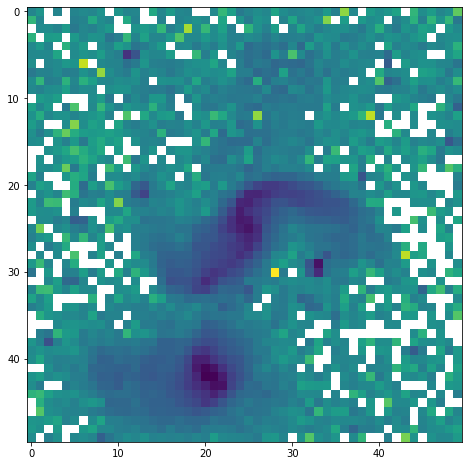

In [18]:
for i in range(len(stellar_pixels[0])):
    x = stellar_pixels[0][i]
    y = stellar_pixels[1][i]
    
    if x - 3 < 0:
        x = x + 3
    if x + 3 > image.shape[0]:
        x = image.shape[0] - 3
    if y - 3 < 0:
        y = y + 3
    if y + 3 > image.shape[1]:
        y = image.shape[1] - 3
    
    replacement = np.median(image[x-3:x+3,y-3:y+3])*np.random.random([6,6])
    
    image_test[x-3:x+3,y-3:y+3] = replacement

plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(image_test) - 48.6)

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip

In [23]:
np.max(1e-30*np.random.poisson(100,[50,50]))

1.3500000000000002e-28

In [25]:
image = np.load(r'C:\Users\oryan\Documents\PySPAM_Original_Python_MCMC\APySPAM_MCMC\sim_input\Arp_256_sim.npy')

In [10]:
np.min(image[image > 0])

1.6080467579632194e-31

In [11]:
np.max(image[image > 0])

3.413453697451024e-27

In [46]:
np.min(1e-31*np.random.random([50,50]))

6.050516161981712e-36

In [72]:
image_noisy = image + 1e-31*np.random.random([50,50])

In [73]:
np.max(image_noisy)

3.413466413695081e-27

In [74]:
np.min(image_noisy)

5.569253887728332e-35

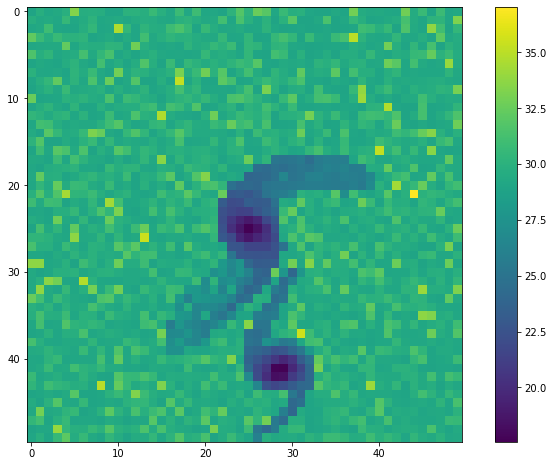

In [75]:
plt.figure(figsize = (12,8))
plt.imshow(-2.5*np.log10(image_noisy) - 48.6)
plt.colorbar()

In [78]:
clipped_image = sigma_clip(image_noisy,sigma=10,maxiters=1,cenfunc = 'median')

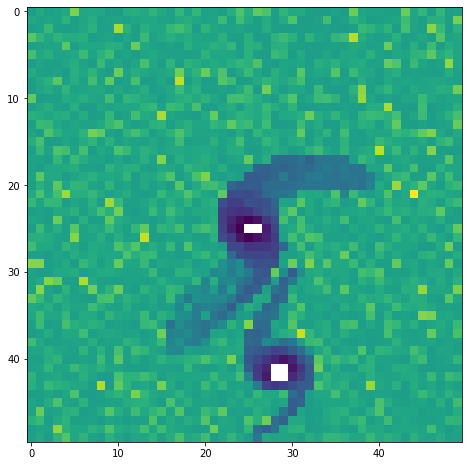

In [79]:
plt.figure(figsize=(12,8))
plt.imshow(-2.5*np.log10(clipped_image) - 48.6)

In [80]:
def Sigma_Calc(Input_Image):
    # Artificial Cleaning of Input 
    input_image = Input_Image.copy()
    input_image[input_image <= 0] = np.min(abs(input_image))
    input_image = input_image/1e-28
    sigma_image = np.sqrt(input_image)
    sigma_image[sigma_image == 0] = np.min(sigma_image[sigma_image > 0])
    sigma_image_exp = (sigma_image * 1e-28).astype('float64')
    
    return sigma_image_exp


In [81]:
sigma_image = Sigma_Calc(image_noisy)